# CS 2803 Final Project
# Lauren Kearley and Jacob Meyers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('play_year.csv', index_col=1)

#### Graph showing number of pass and run plays per NFL season

   Season  PassPerSeason  RunPerSeason
0    2009          16976         13740
1    2010          17212         13604
2    2011          17341         13732
3    2012          17749         13544
4    2013          18107         13452
5    2014          17853         13316
6    2015          18323         13085
7    2016          18305         12975
8    2017          17487         13383


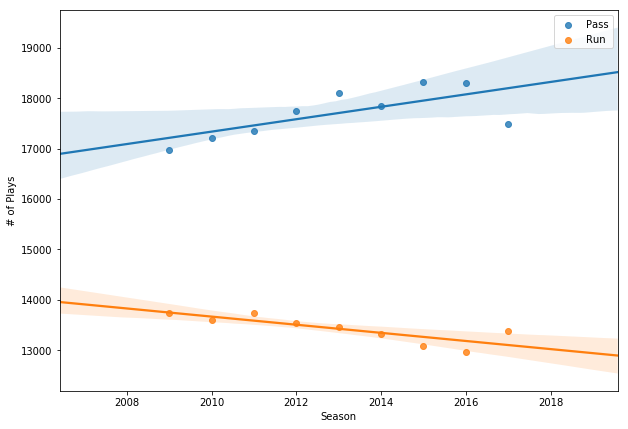

In [29]:
play_per_season = df.groupby(['Season', 'PlayType']).size()
play_per_season = play_per_season.to_frame(name = 'size').reset_index()
pass_season = play_per_season.loc[play_per_season['PlayType'].isin(['Pass'])]
pass_season = pass_season.rename(columns={'size':'PassPerSeason'})
pass_season = pass_season.drop(['PlayType'], axis=1)
pass_season = pass_season.reset_index()
run_season = play_per_season.loc[play_per_season['PlayType'].isin(['Run'])].reset_index()
data = pass_season
data['RunPerSeason'] = run_season[['size']]
data = data.drop(['index'], axis=1)
print(data)
fig, axs = plt.subplots()
sns.regplot(x='Season', y='PassPerSeason', data=data, ax=axs, label="Pass")
sns.regplot(x='Season', y='RunPerSeason', data=data, ax=axs, label="Run")
axs.legend()
axs.set(xlabel='Season', ylabel='# of Plays')
fig.set_size_inches(10, 7)
plt.show()

#### Pie charts of pass vs run plays per NFL season

        PassPerSeason  RunPerSeason
Season                             
2009            16976         13740
2010            17212         13604
2011            17341         13732
2012            17749         13544
2013            18107         13452
2014            17853         13316
2015            18323         13085
2016            18305         12975
2017            17487         13383


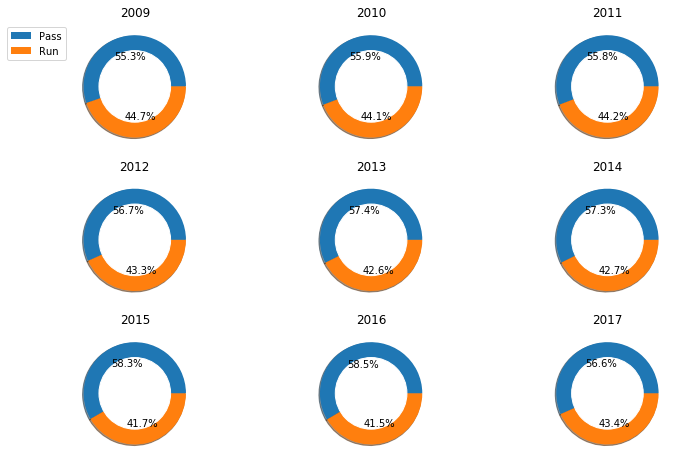

In [96]:
newData = data.copy()
newData = newData.set_index('Season')
doughnut_cutout = plt.Circle( (0,0), 0.7, color='white')
print(newData)
start_date = 2009
fig, axes = plt.subplots(3,3, figsize=(12,8))
for i in range(int(len(newData.index)/3)):
    for j in range(int(len(newData.index)/3)):
        doughnut_cutout = plt.Circle( (0,0), 0.7, color='white')
        ax = axes[i][j]
        pie = ax.pie(newData.loc[start_date],shadow=True, autopct='%.1f%%')
        ax.set(ylabel='', title=start_date, aspect='equal')
        start_date = start_date + 1
        ax.add_artist(doughnut_cutout)
axes[0][0].legend(bbox_to_anchor=(0, 1), labels=['Pass','Run'])
plt.show()